In [1]:
from guidance import models, gen, select, image, user, assistant, system, regex
from guidance._grammar import string
PHI_3_VISION_MODEL = "microsoft/Phi-3-vision-128k-instruct"

In [2]:

model_kwargs = {
    # "_attn_implementation": "eager", # Uncomment this line if flash attention is not working
    "trust_remote_code": True,
    "torch_dtype": "float16",
    "device_map": "auto",
}
phi3v = models.Transformers(
    model=PHI_3_VISION_MODEL, **model_kwargs
)

/home/nicholasking/code/guidance/env/lib/python3.10/site-packages/transformers/models/auto/image_processing_auto.py:517: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
import requests
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor
import os
from huggingface_hub import login

# Retrieve token from environment variable
# login("")


LLAMA_VISION_ID = "meta-llama/Llama-3.2-11B-Vision"
model_id = LLAMA_VISION_ID
model_kwargs = {
    "torch_dtype": "bfloat16",
    "device_map": "auto",
}
llamav = models.Transformers(model=LLAMA_VISION_ID, **model_kwargs)

model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)
processor = AutoProcessor.from_pretrained(model_id)

/home/nicholasking/code/guidance/guidance/models/transformers/_transformers_tokenizer.py:131: UserWarning: Could not build_byte tokens from the tokenizer by encoding token strings: Round-trip encoding of tokens [!] failed! Got [128000, 0]
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [16]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"
image = Image.open(requests.get(url, stream=True).raw)

prompt = "<|begin_of_text|><|image|>If I had to write a haiku for this one"
inputs = processor(image, prompt, return_tensors="pt").to(model.device)

output = model.generate(**inputs, max_new_tokens=30)
print(inputs["input_ids"])
print(processor.decode(output[0]))

inputs = processor(image, prompt, return_tensors="pt", add_special_tokens=False).to(model.device)

output = model.generate(**inputs, max_new_tokens=30)
print(inputs["input_ids"])
print(processor.decode(output[0]))

prompt = "<|begin_of_text|>Hey bud what's this? <|image|>If I had to write a haiku for this one"
inputs = processor(image, prompt, return_tensors="pt", add_special_tokens=False).to(model.device)

output = model.generate(**inputs, max_new_tokens=30)
print(inputs["input_ids"])
print(processor.decode(output[0]))


tensor([[128000, 128000, 128256,   2746,    358,   1047,    311,   3350,    264,
           6520,  39342,    369,    420,    832]], device='cuda:0')
<|begin_of_text|><|begin_of_text|><|image|>If I had to write a haiku for this one, it would be:.\nPeter Rabbit is a rabbit.\nHe lives in a hole in the ground.\nHe's a very naughty rabbit
tensor([[128000, 128256,   2746,    358,   1047,    311,   3350,    264,   6520,
          39342,    369,    420,    832]], device='cuda:0')
<|begin_of_text|><|image|>If I had to write a haiku for this one, it would be:.\nPeter Rabbit is a.\nCute little bunny.\nWho loves to eat carrots.\nI'm not a
tensor([[128000,  19182,  37808,   1148,    596,    420,     30,    220, 128256,
           2746,    358,   1047,    311,   3350,    264,   6520,  39342,    369,
            420,    832]], device='cuda:0')
<|begin_of_text|>Hey bud what's this? <|image|>If I had to write a haiku for this one, it would be:.\nBunny in a blue jacket.\nHopping down a country lane.\nWi

In [4]:
prompt = "<|begin_of_text|>If I had to write a haiku for this one"
image = None
inputs = processor(image, prompt, return_tensors="pt").to(model.device)

output = model.generate(**inputs, max_new_tokens=30)
print(processor.decode(output[0]))
print(inputs)
print(inputs["input_ids"][0].tolist())

<|begin_of_text|><|begin_of_text|>If I had to write a haiku for this one, it would be:
Golden light descends
Golden light ascends again
Golden light remains
I love the way the light dances through the trees
{'input_ids': tensor([[128000, 128000,   2746,    358,   1047,    311,   3350,    264,   6520,
          39342,    369,    420,    832]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
[128000, 128000, 2746, 358, 1047, 311, 3350, 264, 6520, 39342, 369, 420, 832]


In [12]:
prompt = "If I had to write a haiku for this one"
image = None
inputs = processor(image, prompt, return_tensors="pt").to(model.device)

output = model.generate(**inputs, max_new_tokens=30)
print(processor.decode(output[0]))
print(inputs)

<|begin_of_text|><|begin_of_text|>If I had to write a haiku for this one, it would be:
Golden light descends
Golden light ascends again
Golden light remains
I love the way the light dances through the trees
{'input_ids': tensor([[128000, 128000,   2746,    358,   1047,    311,   3350,    264,   6520,
          39342,    369,    420,    832]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}


In [8]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"
image = Image.open(requests.get(url, stream=True).raw)

prompt = "<|image|><|begin_of_text|>If I had to write a haiku for this one"
inputs = processor(image, prompt, return_tensors="pt").to(model.device)

output = model.generate(**inputs, max_new_tokens=30)
print(processor.decode(output[0]))
print(inputs)

<|begin_of_text|><|image|><|begin_of_text|>If I had to write a haiku for this one, it would be:.\nPeter Rabbit is a rabbit.\nHe lives in a hole in the ground.\nHe's a bit of a
{'input_ids': tensor([[128000, 128256, 128000,   2746,    358,   1047,    311,   3350,    264,
           6520,  39342,    369,    420,    832]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[[[ 1.5508,  1.4778,  1.4048,  ...,  0.8792,  0.8792,  0.8792],
            [ 1.5216,  1.4632,  1.3902,  ...,  0.7479,  0.7479,  0.7479],
            [ 1.5070,  1.4340,  1.3610,  ...,  0.5727,  0.5873,  0.6311],
            ...,
            [ 0.3683,  0.4267,  0.4851,  ...,  1.5362,  1.5508,  1.5654],
            [ 0.3391,  0.3975,  0.4705,  ...,  1.5654,  1.5654,  1.5508],
            [ 0.3391,  0.4121,  0.4851,  ...,  1.5800,  1.5800,  1.5654]],

           [[ 1.6697,  1.6096,  1.5646,  ...,  1.0544,  1.0243,  1.0844],
            [ 1.65

In [ ]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"
image = Image.open(requests.get(url, stream=True).raw)

prompt = "<|image|>If I had to write a haiku for this one"
inputs = processor(image, prompt, return_tensors="pt").to(model.device)

output = model.generate(**inputs, max_new_tokens=30)
print(processor.decode(output[0]))
print(inputs)

In [3]:
lm = llamav
lm += "Hello"
lm += gen(max_tokens=30)

In [14]:
lm = phi3v
# lm = llamav

with user():
    lm += "What is the capital of Hawaii?"

with assistant():
    lm += gen(stop="<|end|>")

with user():
    lm += "What is the population of Hawaii?"

with assistant():
    lm += gen(stop="<|end|>")

with user():
    lm += "What country is Hawaii in?"

with assistant():
    lm += gen(stop="<|end|>")

ValueError: operands could not be broadcast together with shapes (128256,) (128257,) (128256,) 

In [4]:
from guidance import image


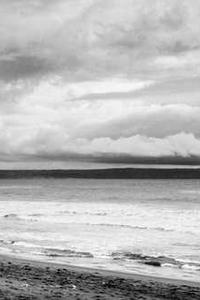

TypeError: MllamaForCausalLM.forward() got an unexpected keyword argument 'pixel_values'

In [5]:
lm = llamav
image_url = "https://picsum.photos/200/300"
lm += "What do you see in this image?" + image(image_url)
lm += gen(temperature=0.8)


In [16]:
# No constraints test

lm = phi3v

with user():
    image_url = "https://picsum.photos/200/300"
    print(type(lm))
    lm += "What do you see in this image?" + image(image_url)

with assistant():
    lm += gen(temperature=0.8)

<class 'guidance.models.transformers._transformers.Transformers'>


TypeError: 'NoneType' object is not callable


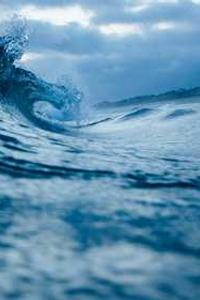

In [5]:
# With constraints test

lm = phi3v

with user():
    image_url = "https://picsum.photos/200/300"
    lm += "What do you see in this image?" + image(image_url)

with assistant():
    # lm += "The image portrays a " + select(["dog", "cat", "person", "thing", "place"])
    lm += f'The image portrays a ' 
    for i in range(10):
        lm += regex("[a-z]{1,16}") + gen(max_tokens=3) + ' '
    for i in range(15):
        lm += chr(ord('A') - 1 + i) + regex("[a-z]{1,16}") + ' '
    lm += f', but I lied, actually it shows '
    for i in range(10):
        lm += regex("[a-z]{1,16}") + gen(max_tokens=3) + ' '

In [6]:
print(lm)

<|user|>
What do you see in this image?<|_IMAGE:94898769574208|><|end|>
<|assistant|>
The image portrays a vintage car, ex machina, in a state of disrep air. The car is painted in a shade of black, with a white stri peeking out from the side. The h ighlight of the car @sits Autoworks Buick Century Deluxe Engines Fontana Greenwich Henry Indicator Joyce Kensington Labels Motorcycle News , but I lied, actually it shows the emblem of the Buick Century on the side of the car. The car is parked in a dimly lit garage, with a brick wall visible in the background and a white light <|end|>



In [8]:
print(lm)

<|user|>
What do you see in this image?<|_IMAGE:94898754310144|><|end|>
<|assistant|>
The image portrays a vintage car, ex machina, in a state of disrep air. The car is painted in a shade of black, with a white stri peeking out from the side. The h ighlight of the car @sits Autoworks Buick Century Deluxe Engines Fontana Greenwich Henry Indicator Joyce Kensington Labels Motorcycle News , but I lied, actually it shows the emblem of the Buick Century on the side of the car. The car is parked in a dimly lit garage, with a brick wall visible in the background and a white light <|end|>

